This file contains functions to visualize and select the best training curves from our experiments.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('cmu_paper')

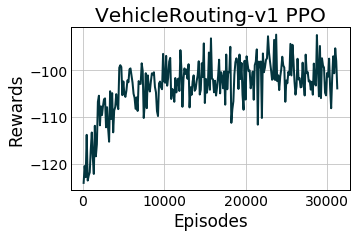

/home/christian/ray_results/PPO/PPO_VehicleRouting-v1_238b7de5_3_entropy_coeff=0.001,lr=1e-05,vf_share_layers=False_2020-04-02_20-20-4547ljic2_


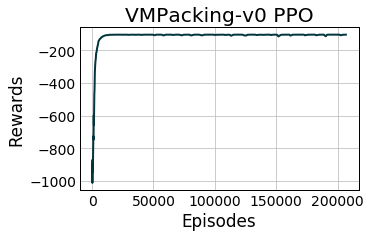

/home/christian/ray_results/PPO/PPO_VMPacking-v0_8ded77bb_3_entropy_coeff=0.001,lr=1e-05,vf_share_layers=False_2020-04-11_21-14-4011bt9ii8


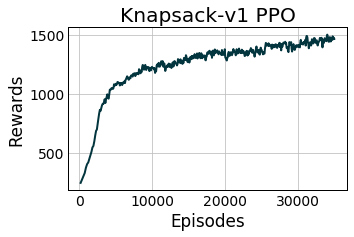

/home/christian/ray_results/PPO/PPO_Knapsack-v1_0a0c1d2d_7_entropy_coeff=0.001,lr=0.0001,vf_share_layers=False_2020-04-01_02-48-14vl_32i4a


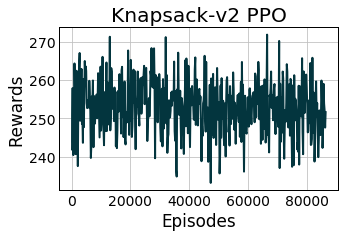

/home/christian/ray_results/PPO/PPO_Knapsack-v2_4fcb9d30_2_entropy_coeff=0.01,lr=1e-05,vf_share_layers=False_2020-04-01_08-58-59vtcxsutg


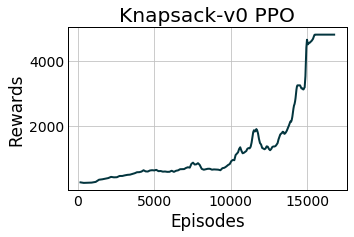

/home/christian/ray_results/PPO/PPO_Knapsack-v0_70012da3_1_lr=0.001,vf_share_layers=True_2020-03-21_16-39-26_z6_97l8


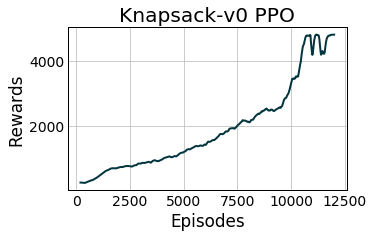

/home/christian/ray_results/PPO/PPO_Knapsack-v0_70012da4_2_lr=0.0001,vf_share_layers=True_2020-03-21_17-13-03j4saa4bw


In [2]:
# Get data from results folders
result_path = '../or_gym/benchmarks/results'
results = os.listdir(result_path)
envs = set([i.split('_')[0] for i in results])
for env in envs:
    result_data = pd.DataFrame()
    for data_path in results:
        if env in data_path:
            _result_data = pd.read_csv(
                os.path.join(result_path, data_path))
            result_data = pd.concat([result_data, _result_data])
            
    top_results = result_data.loc[
        result_data['episode_reward_mean']==result_data['episode_reward_mean'].max()]
    
    for _path in top_results['logdir']:
        algo_name = os.path.basename(_path).split('_')[0]
        train_data = pd.read_csv(_path + '/progress.csv')
        plt.figure(figsize=(5, 3))
        plt.plot(train_data['episodes_total'], train_data['episode_reward_mean'])
        plt.xlabel('Episodes')
        plt.ylabel('Rewards')
        plt.title(env + ' ' + algo_name)
        plt.show()
        print(_path)